In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
input_file_path = 'C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.xlsx'
output_file_path = 'C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv'
df = pd.read_excel(input_file_path)
df.to_csv(output_file_path, index=False)

print(f"Excel file '{input_file_path}' has been successfully converted to CSV file '{output_file_path}'.")


Excel file 'C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.xlsx' has been successfully converted to CSV file 'C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv'.


In [9]:
df = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [11]:
plt.style.use("ggplot")
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",10)
plt.show()

In [12]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,...,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Phone,3,...,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,...,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,...,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Phone,1,...,13.0,2.0,2.0,2.0,134.41


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

In [15]:
df = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv')

# Feature Engineering

# Example 1: Calculate the average order amount per order count
df['AvgOrderAmount'] = df['OrderAmountHikeFromlastYear'] / df['OrderCount']

# Example 2: Create a binary column indicating whether the customer has ever made a complaint
df['HasComplaint'] = df['Complain'].apply(lambda x: 1 if x > 0 else 0)

# Example 3: Combine 'NumberOfDeviceRegistered' and 'NumberOfAddress' into a single column indicating the total interactions with the customer
df['TotalInteractions'] = df['NumberOfDeviceRegistered'] + df['NumberOfAddress']

# Example 4: Create a binary column indicating whether the customer has used a coupon or cashback
df['UsedCouponOrCashback'] = df['CouponUsed'].astype(bool) | (df['CashbackAmount'] > 0)

# Example 5: Binning 'Tenure' into categories
tenure_bins = [0, 12, 24, 36, float('inf')]
tenure_labels = ['0-12 months', '13-24 months', '25-36 months', 'Over 36 months']
df['TenureCategory'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Example 6: Mapping satisfaction score to descriptive labels
satisfaction_labels = {1: 'Unhappy', 2: 'Neutral', 3: 'Satisfied', 4: 'Very Satisfied', 5: 'Delighted'}
df['SatisfactionLabel'] = df['SatisfactionScore'].map(satisfaction_labels)



In [17]:
df = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv')
# Convert 'Churn' column to binary values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Now, the 'Churn' column contains binary values where 1 indicates churned customers and 0 indicates non-churned customers.

**SimpleImputer** 

While executing the code below I found X input containing NaN and the Logistic Regression does not handle missing values. So instead of droping the missing values using the **'dropna()'**, I have used the imputation method where it replaces the missing values with estimated values.

Use **'from sklearn.impute import SimpleImputer'** to fill the missing values with mean, median, or most frequent value of the respective column.

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
df = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/E-Commerce/E Commerce Dataset.csv')
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus', 'Complain'])
# Perform label encoding for the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Assuming 'X' contains the features and 'y' contains the target variable (Churn)
X = df.drop('Churn', axis=1)  # Features (replace 'Churn' with the target column name)
y = df['Churn']  # Target variable (replace 'Churn' with the target column name)
# Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_imputed = imputer.fit_transform(X)
# Split data into training and testing sets, ensuring balanced churn distribution
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

Initially while executing the above code I encountered some errors, so I have made use of **One-hot-encoding** using panads 'pd.get_dummies to convert the catogorical columns to numerical format before training the Logistic Regression. Similarly I encountered it for the Gender column and I used **Label Encoding** from sklearn.preprocessing to transform the gender column to Numerical format (e.g., 'Male' -> 0, 'Female' -> 1), allowing logistic regression to handle categorical data effectively.

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       936
           1       0.63      0.28      0.39       190

    accuracy                           0.85      1126
   macro avg       0.75      0.62      0.65      1126
weighted avg       0.83      0.85      0.83      1126

Confusion Matrix:
[[905  31]
 [137  53]]


ROC-AUC Score: 0.8186009896536213


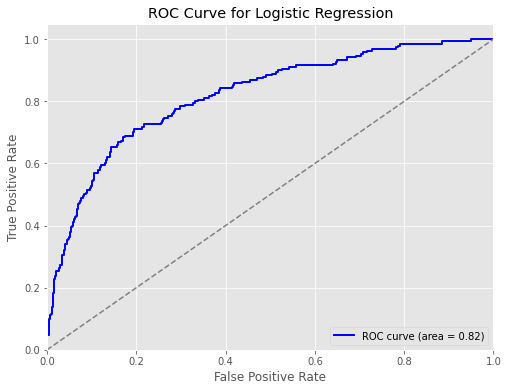

In [43]:
y_prob = logreg_model.predict_proba(X_test)[:, 1]
# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC-AUC Score:", roc_auc)
# Calculate FPR and TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Classifier Accuracy: 0.9653641207815276
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       936
           1       0.97      0.82      0.89       190

    accuracy                           0.97      1126
   macro avg       0.97      0.91      0.93      1126
weighted avg       0.97      0.97      0.96      1126

Confusion Matrix:
[[932   4]
 [ 35 155]]


ROC-AUC Score: 0.9957405533063427


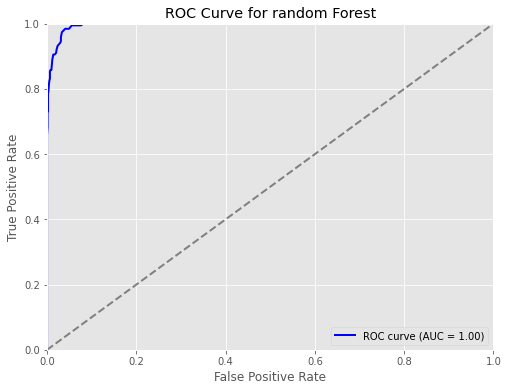

In [44]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class (Churn = 1)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))

Gradient Boosting Classifier Accuracy: 0.9129662522202486
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       936
           1       0.81      0.64      0.71       190

    accuracy                           0.91      1126
   macro avg       0.87      0.80      0.83      1126
weighted avg       0.91      0.91      0.91      1126

Confusion Matrix:
[[907  29]
 [ 69 121]]


ROC-AUC Score: 0.6951557579847053


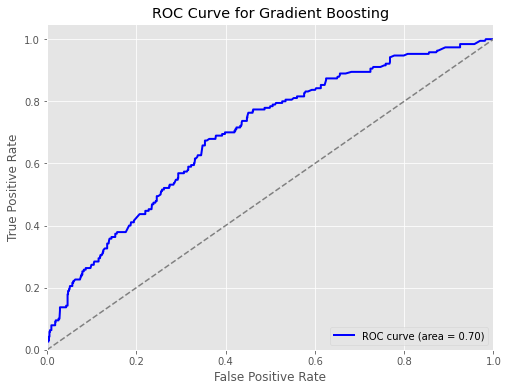

In [48]:
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class (Churn)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [51]:
from sklearn.svm import SVC
# Support Vector Machine Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))


Support Vector Machine Classifier Accuracy: 0.8383658969804618
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       936
           1       0.79      0.06      0.11       190

    accuracy                           0.84      1126
   macro avg       0.81      0.53      0.51      1126
weighted avg       0.83      0.84      0.78      1126

Confusion Matrix:
[[933   3]
 [179  11]]


ROC-AUC Score: 0.8488585245164193


c:\users\sivkh\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


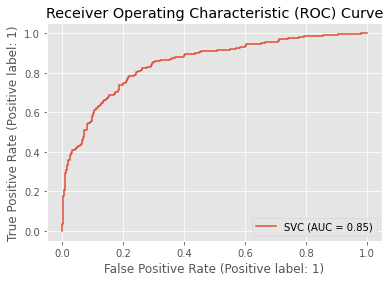

In [53]:
from sklearn.metrics import plot_roc_curve
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
roc_curve_display = plot_roc_curve(svm_model, X_test_scaled, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [54]:
from sklearn.neural_network import MLPClassifier
# Neural Network Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_y_pred)
print("Neural Network Classifier Accuracy:", nn_accuracy)
print(classification_report(y_test, nn_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_y_pred))


Neural Network Classifier Accuracy: 0.8312611012433393
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       936
           1       0.00      0.00      0.00       190

    accuracy                           0.83      1126
   macro avg       0.42      0.50      0.45      1126
weighted avg       0.69      0.83      0.75      1126

Confusion Matrix:
[[936   0]
 [190   0]]


c:\users\sivkh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sivkh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sivkh\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

ROC-AUC Score: 0.6700236167341431


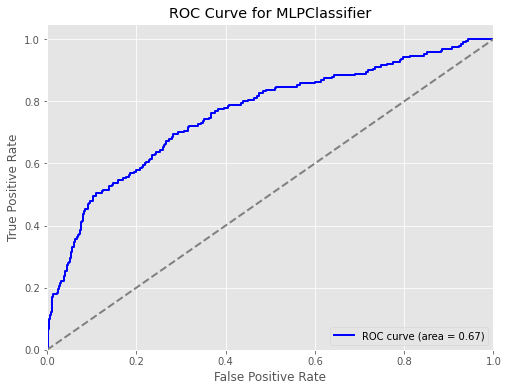

In [57]:
y_pred = nn_model.predict(X_test_scaled)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier')
plt.legend(loc="lower right")
plt.show()

**Feature Importance Analysis**

Here we plot the feature importances using a bar chart to visualize the relative importance of different features in predicting churn. The higher the bar, the more important the corresponding feature is in the model's predictions.

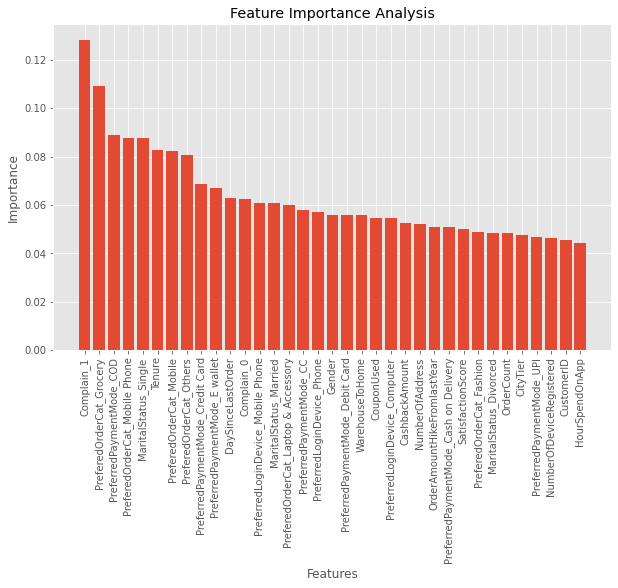

In [58]:
# Extract feature importances from the model
# Get weights between input layer and first hidden layer
input_layer_weights = nn_model.coefs_[0]

# Calculate absolute importance for each feature based on weights
feature_importance = np.abs(input_layer_weights).mean(axis=1)

# Sort features by importance (descending order)
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_feature_importance, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.show()